## Code to generate Figure 2B-C graphics
For each peptide simulation, merged replicate trajectories were analyzed using 'soursop' to determine per-frame radius of gyration (B) and the number of total dssp-assigned helical residues per simulation frame (C)

This code loads text files from 'data/'.

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
## load text files containing Rg per frame ##

aTH4_Rg = np.loadtxt('data/aTH4_Rgs.txt')
pTH4_Rg = np.loadtxt('data/pTH4_Rgs.txt')

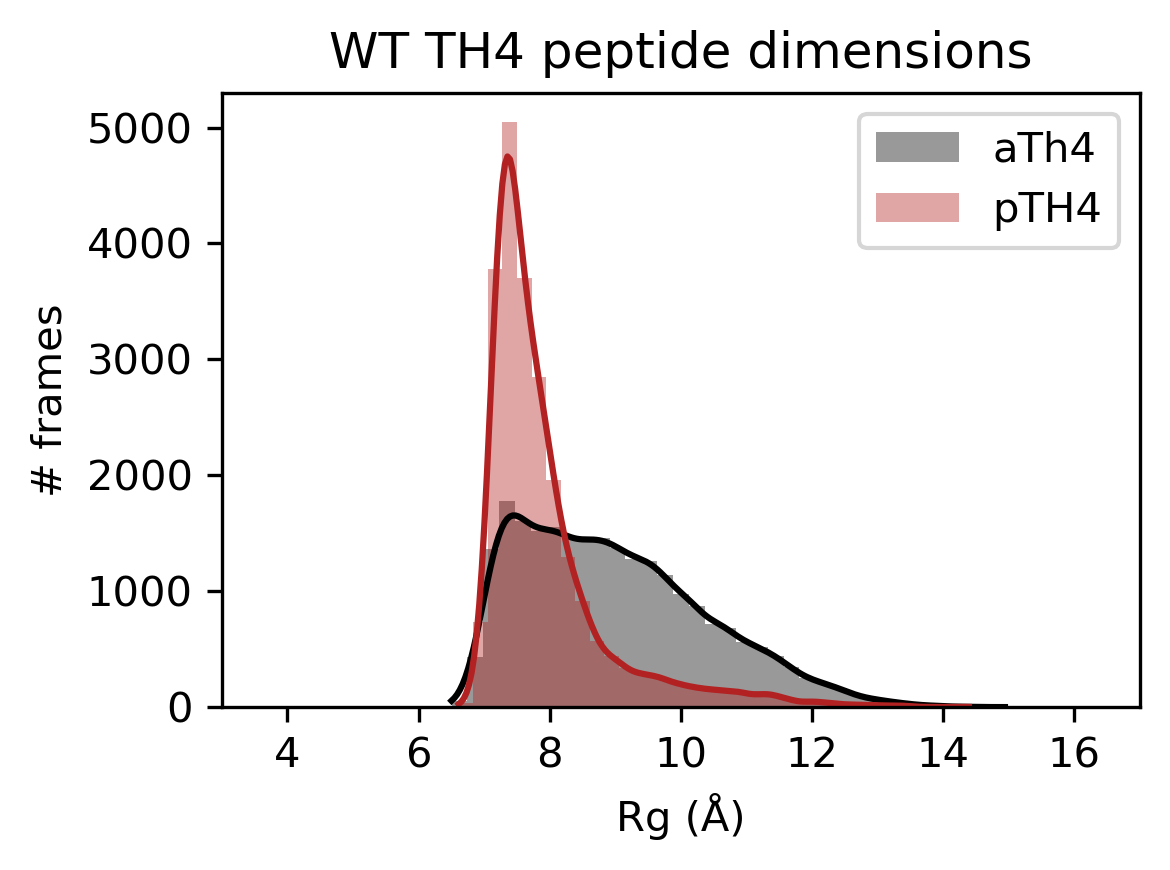

In [8]:
## generate Rg distributions for apo-TH4 (aTH4) and phospho-TH4 (pTH4) (PANEL B) ##
plt.figure(num = None, figsize = (4, 3), dpi = 300, facecolor = 'w', edgecolor = 'k')

sns.histplot(data = aTH4_Rg, color="k", alpha = 0.4, lw = 0, label = 'aTh4', fill = True, bins = 35, kde = True)
sns.histplot(data = pTH4_Rg, color="firebrick", lw = 0, alpha = 0.4, label = 'pTH4', fill = True, bins = 35, kde = True)

plt.title('WT TH4 peptide dimensions')
plt.ylabel('# frames')
plt.xlabel('Rg (Å)')

plt.xlim([3, 17])
#plt.ylim([0, 1])

plt.tight_layout()
plt.legend(loc = 'upper right', prop={'size': 10})

plt.savefig('WT_TH4_Rg_dists_2B.pdf', format = 'pdf', dpi = 300)
plt.show()


In [10]:
## load text files containing number (int) of helical residues per simulation frame ##
# for each coil-start (Cstart) and helical-start (Hstart) simulations

aTH4_Hstart = np.loadtxt('data/aTH4_helical_hstart.txt')
aTH4_Cstart = np.loadtxt('data/aTH4_helical_cstart.txt')

pTH4_Hstart = np.loadtxt('data/pTH4_helical_hstart.txt')
pTH4_Cstart = np.loadtxt('data/pTH4_helical_cstart.txt')

frames = np.arange(1, len(aTH4_Hstart.T)+1, 1)

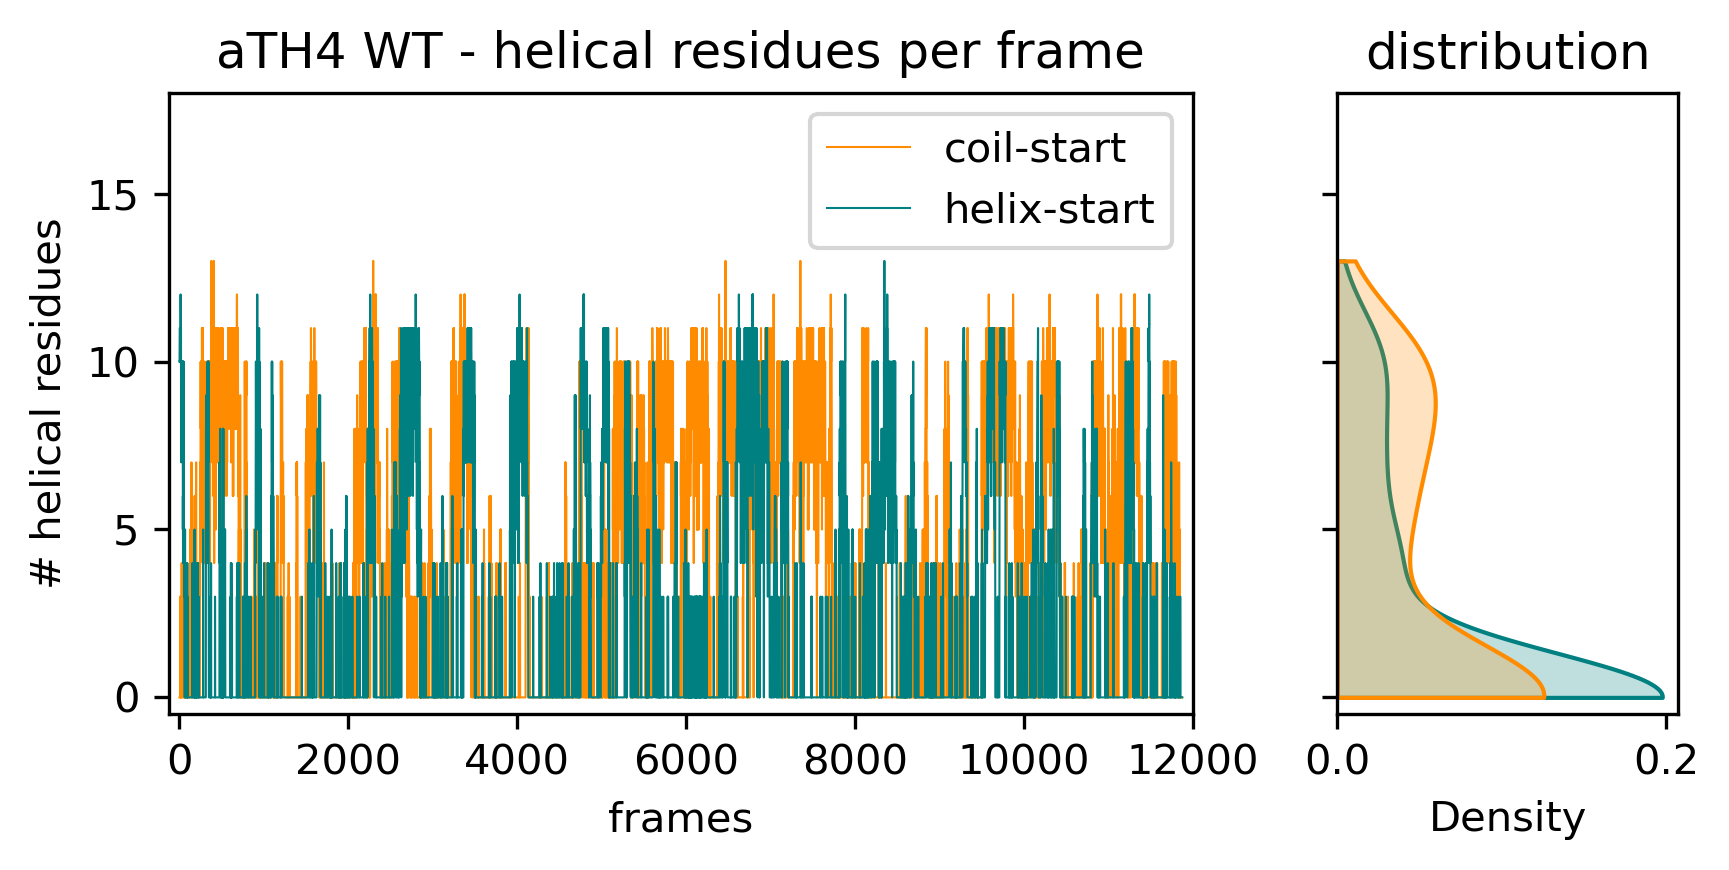

In [27]:
## generate number of helical residues per frame for unphosphorylated TH4 (aTH4) (PANEL C 1/2) ##
# left panel is plot of number of helical residues vs. frame
# right panel is the distribution of number of helical residues for the simulation (as kde)

fig, axes = plt.subplots(1, 2, figsize = (6, 3), dpi = 300, sharey = True, gridspec_kw={'width_ratios': [3, 1]})


axes[0].plot(frames, aTH4_Cstart, color = 'darkorange', lw = 0.5, label = 'coil-start')
axes[0].plot(frames, aTH4_Hstart, color = 'teal', lw = 0.5, label = 'helix-start')

axes[0].set_xlim([-125, 12000])
axes[0].set_ylim([-0.5, 18])

axes[0].set_ylabel('# helical residues')
axes[0].set_xlabel('frames')

sns.kdeplot(ax = axes[1], y = aTH4_Hstart, color = 'teal', fill = True, bw_method = 0.4, cut = 0, label = 'helix-start')
sns.kdeplot(ax = axes[1], y = aTH4_Cstart, color = 'darkorange', fill = True, bw_method = 0.4, cut = 0, label = 'coil-start')

axes[0].set_title('aTH4 WT - helical residues per frame')
axes[1].set_title('distribution')

axes[0].legend(loc = 'upper right')

plt.tight_layout()
plt.savefig('aTH4_hel_per_frame_2C.pdf', format = 'pdf', dpi = 300)
plt.show()

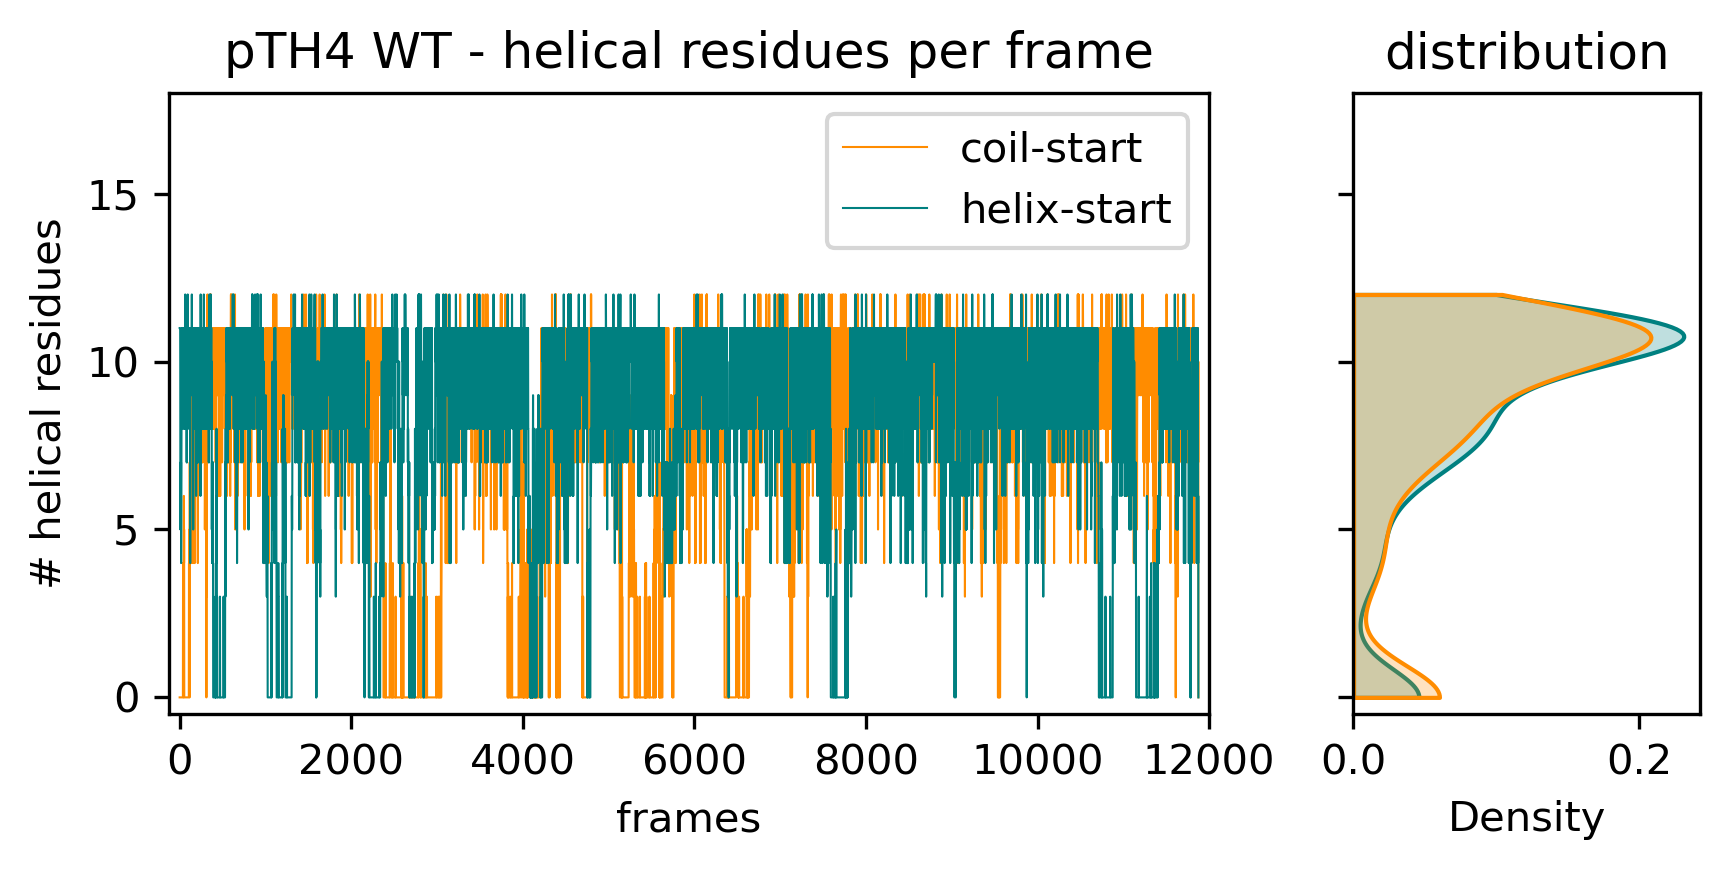

In [31]:
## generate number of helical residues per frame for phosphorylated TH4 (pTH4) (PANEL C 2/2) ##
# left panel is plot of number of helical residues vs. frame
# right panel is the distribution of number of helical residues for the simulation (as kde)

fig, axes = plt.subplots(1, 2, figsize = (6, 3), dpi = 300, sharey = True, gridspec_kw={'width_ratios': [3, 1]})


axes[0].plot(frames, pTH4_Cstart, color = 'darkorange', lw = 0.5, label = 'coil-start')
axes[0].plot(frames, pTH4_Hstart, color = 'teal', lw = 0.5, label = 'helix-start')

axes[0].set_xlim([-125, 12000])
axes[0].set_ylim([-0.5, 18])

axes[0].set_ylabel('# helical residues')
axes[0].set_xlabel('frames')

sns.kdeplot(ax = axes[1], y = pTH4_Hstart, color = 'teal', fill = True, bw_method = 0.25, cut = 0, label = 'helix-start')
sns.kdeplot(ax = axes[1], y = pTH4_Cstart, color = 'darkorange', fill = True, bw_method = 0.25, cut = 0, label = 'coil-start')

axes[0].set_title('pTH4 WT - helical residues per frame')
axes[1].set_title('distribution')

axes[0].legend(loc = 'upper right')

plt.tight_layout()
plt.savefig('pTH4_hel_per_frame_2C.pdf', format = 'pdf', dpi = 300)
plt.show()